# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">A Comparative Study of Smartphones Available in 2024</p>

<p style="text-align:justify; ">
    
In the smartphone market, each model caters to different types of users, and every device comes with its own set of specifications and price points. Consumers often search through numerous options, comparing features, prices, and reviews to find the best fit for their needs. However, the sheer volume of available models can make this process overwhelming, leaving buyers uncertain about which phone offers the best value for their preferences. Businesses, therefore, must provide well-researched insights and comparisons that help users navigate through these choices. By analyzing phone specifications, performance, and pricing, companies can offer personalized recommendations that enhance the shopping experience, improve customer satisfaction, and ultimately boost sales and engagement on their platforms.
</p>

<a id='top'></a>

<p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>
<div class="list-group" id="list-tab" role="tablist" style="width: 15%; margin: 0 auto;">

| No  | Contents                                                              |
| :-- | :-------------------------------------------------------------------- |
| 1   | [<font color="#0f4c5c"> Importing Libraries</font>](#1)               |
| 2   | [<font color="#0f4c5c"> About Dataset</font>](#2)                     |
| 3   | [<font color="#0f4c5c"> Basic Exploration and Cleaning</font>](#3)    |
| 4   | [<font color="#0f4c5c"> Grouping Listings from E-commerce</font>](#4) |
| 5   | [<font color="#0f4c5c"> Dataset Summary</font>](#5)                   |
| 6   | [<font color="#0f4c5c"> Price Distribution</font>](#6)                |
| 7   | [<font color="#0f4c5c"> Correlations</font>](#7)                      |
| 8   | [<font color="#0f4c5c"> Most Common Configs</font>](#8)               |
| 9   | [<font color="#0f4c5c"> Displays</font>](#9)                          |
| 10  | [<font color="#0f4c5c"> Final Thoughts</font>](#10)                   |


<a id="1"></a>

# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import re
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from prettytable import PrettyTable
from pandas import json_normalize


<a id="2"></a>

# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>


This dataset contains information on phones listed on GSMArena.com, one of the most popular and reputable websites for smartphone specifications and reviews. I have personally scraped the data to provide a comprehensive overview of the phones currently available on the market.

In this notebook, we will focus on analyzing only a subset of the data, specifically the phones that are still listed for sale. Older models or discontinued listings have been excluded to keep the analysis relevant to the current market.

**data.json**

- **phone_brand :** The manufacturer or brand of the phone (e.g., Apple, Samsung, Xiaomi).
- **phone_model :** The specific model name or number of the phone.
- **price :** he price point of the phone, which may be either an exact figure or a rough estimate. Note: The price data may require cleaning, which will be addressed later in this notebook.
- **specs :** A dictionary of dictionaries detailing the phone’s technical specifications, including all relevant features such as screen size, camera resolution, processor, battery life, and more.
- **pricing :** A dictionary of dictionaries that contains price listings for the phone across various e-commerce websites.

In this notebook, we will clean the data, explore key features, and analyze the relationships between phone specifications and pricing. After the analysis, a cleaned and structured version of the dataset will be provided, making it easier to work with for further insights or future use. This process will help identify trends in the smartphone market and offer insights into which models provide the best value based on their technical specifications.


<a id="3"></a>

# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration and Cleaning</p>

**Let's have a glimpse of the dataset.**


### Tools and Libraries:

- **Python:**  
  Used as the primary language for the scraping process.

#### Libraries:
- **Scrapy:**  
- **Pandas:**  
### Data Collection Strategy:

#### Phone Listings:
- I started by navigating through the phone brand and model listings on GSMArena's homepage.
- For each phone, I followed the links to the detailed specifications page.

#### HTML Structure:
- I carefully inspected the HTML structure of each page to identify the tags that contained relevant information, such as:
  - Phone model, brand, launch year.
  - Technical specifications (e.g., screen size, chipset, battery).
  - Pricing from multiple stores (if available).
  - Camera and multimedia specifications.

#### Pagination and Dynamic Content:
- I handled pagination to ensure the full range of phone models was captured.

#### E-Commerce Prices:
- I extracted pricing information for each phone from GSMArena’s "Buyers Information" section, which often lists prices from multiple e-commerce stores.
- These prices were collected in native currencies, which were later converted to USD.


In [2]:
df = pd.read_json('data/data.json')
specs_normalized = json_normalize(df['specs'])
df = df.drop(columns=['specs']).join(specs_normalized)
print(f"Shape of The Anime Dataset : {df.shape}")
print(f"\nGlimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Anime Dataset : (8792, 85)

Glimpse of The Dataset :


,phone_brand,phone_model,price,pricing,Network.2G bands,Network.3G bands,Network.4G bands,Network.Speed,Network.GPRS,Network.EDGE,Launch.Announced,Launch.Status,Body.Dimensions,Body.Weight,Body.Build,Body.SIM,Display.Type,Display.Size,Display.Resolution,Platform.OS,Memory.Card slot,Memory.Internal,Sound.Loudspeaker,Sound.3.5mm jack,Comms.WLAN,Comms.Bluetooth,Comms.Positioning,Comms.NFC,Comms.Radio,Comms.USB,Features.Sensors,Battery.Type,Misc.Colors,Platform.Chipset,Platform.CPU,Platform.GPU,Main Camera.Triple,Main Camera.Features,Main Camera.Video,Selfie camera.Single,Selfie camera.Video,Battery.Charging,Misc.Price,Display.Protection,Battery.Stand-by,Battery.Talk time,Misc.Models,Tests.Loudspeaker,Tests.Performance,Tests.Display,Tests.Battery (old),Main Camera.Single,Main Camera.Dual,Main Camera.Quad,Network.5G bands,Network.Technology,Selfie Camera.Single,Selfie Camera.Video,Comms.Infrared port,Selfie camera.Features,Main Camera.Penta,Selfie camera.Dual,Tests.Camera,Misc.SAR,Selfie Camera.Features,Features.Languages,Body.Keyboard,Memory.Phonebook,Memory.Call records,Features.Messaging,Features.Browser,Features.Games,Features.Java,Misc.SAR EU,Tests.Audio quality,Tests.Battery (new),Battery.Music play,Sound.Alert types,Features.Clock,Features.Alarm,Selfie camera.No,Selfie camera.Triple,Main Camera.Dual or Triple,Main Camera.Five,Selfie Camera.Dual
0,itel,itel Smart Watch 1,None,nan,N/A,N/A,N/A,No,No,No,2022,Available. Released 2022,-,-,"Plastic back, plastic frame",No,IPS LCD,1.72 inches,240 x 283 pixels (~216 ppi density),Proprietary OS,No,Unspecified storage,Yes,No,No,"5.0, A2DP, LE",No,No,No,No,"Accelerometer, heart rate, SpO2","200 mAh, non-removable",Black,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,oukitel,Oukitel WP19,About 380 EUR,nan,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100,LTE,"HSPA, LTE",nan,nan,"2022, June","Available. Released 2022, July",-,-,nan,"Dual SIM (Nano-SIM, dual stand-by)","IPS LCD, 90Hz","6.78 inches, 109.2 cm",1080 x 2460 pixels (~396 ppi density),Android 12,microSDXC (dedicated slot),256GB 8GB RAM,Yes,Unspecified,Yes,Yes,"GPS, GLONASS, GALILEO, BDS",Yes,Unspecified,"USB Type-C 2.0, OTG",Unspecified,"Li-Po 21000 mAh, non-removable","Blue, Camo, Camouflage",Mediatek MT6785V/CD Helio G95 (12 nm),Octa-core (2x2.05 GHz Cortex-A76 & 6x2.0 GHz Cortex-A55),Mali-G76 MC4,"64 MP, f/1.8, (wide), PDAF","LED flash, panorama","4K@30fps, 1080p@30fps",16 MP,Yes,33W wired,About 380 EUR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,cubot,Cubot Smart Watch,None,nan,N/A,N/A,N/A,No,No,No,2020,Available. Released 2020,41.6 x 41.6 x 11.6 mm (1.64 x 1.64 x 0.46 in),-,nan,No,TFT LCD,1.3 inches,240 x 240 pixels (~261 ppi density),Proprietary OS,No,nan,No,No,No,"5.0, A2DP, LE",No,No,No,No,"Accelerometer, gyro, heart rate","210 mAh, non-removable","Black, Pink",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Scratch-resistant glass,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,cubot,Cubot ID206,None,nan,N/A,N/A,N/A,No,No,No,2020,Available. Released 2020,40 x 40 x 12 mm (1.57 x 1.57 x 0.47 in),-,nan,No,TFT LCD,1.7 inches,240 x 280 pixels (~217 ppi density),Proprietary OS,No,nan,No,No,No,"5.0, A2DP, LE",No,No,No,No,"Accelerometer, gyro, heart rate, SpO2","300 mAh, non-removable","Black, Pink",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Scratch-resistant glass,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,tcl,TCL Plex,About 330 EUR,nan,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (D

In [3]:
print(f"Informations About Dataset :\n")
print(df.info())

Informations About Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8792 entries, 0 to 8791
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   phone_brand                 8792 non-null   object
 1   phone_model                 8722 non-null   object
 2   price                       7184 non-null   object
 3   pricing                     795 non-null    object
 4   Network.2G bands            8782 non-null   object
 5   Network.3G bands            6956 non-null   object
 6   Network.4G bands            5161 non-null   object
 7   Network.Speed               6893 non-null   object
 8   Network.GPRS                2160 non-null   object
 9   Network.EDGE                2156 non-null   object
 10  Launch.Announced            8775 non-null   object
 11  Launch.Status               8782 non-null   object
 12  Body.Dimensions             8768 non-null   object
 13  Body.Weight       

**Let's seperete the phones that are currenlty listed from the rest.**


In [4]:
df['europe_pricing'] = df['pricing'].apply(lambda x: x.get('Europe', {}) if isinstance(x, dict) else {})
df['USA_pricing'] = df['pricing'].apply(lambda x: x.get('United States', {}) if isinstance(x, dict) else {})
df['UK_pricing'] = df['pricing'].apply(lambda x: x.get('United Kingdom', {}) if isinstance(x, dict) else {})
df['International_pricing'] = df['pricing'].apply(lambda x: x.get('International', {}) if isinstance(x, dict) else {})
df['Canada_pricing'] = df['pricing'].apply(lambda x: x.get('Canada', {}) if isinstance(x, dict) else {})
df['Australia_pricing'] = df['pricing'].apply(lambda x: x.get('Australia', {}) if isinstance(x, dict) else {})
df = df.sort_values(by='phone_brand').reset_index(drop=True)

<a id="4"></a>

# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Grouping Listings from E-commerce</p>


**I took only the columns from the dataframe that i considered valuable for this analysis**


In [5]:
new_rows = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    phone_brand = row['phone_brand']
    phone_model = row['phone_model']
    europe_pricing = row['europe_pricing']
    Launch = row['Launch.Status']
    Dimensions = row['Body.Dimensions']
    Weight = row['Body.Weight']
    Display_Type = row['Display.Type']
    Display_Size = row['Display.Size']
    Display_Resolution = row['Display.Resolution']
    OS = row['Platform.OS']
    NFC = row['Comms.NFC']
    USB = row['Comms.USB']
    BATTERY = row['Battery.Type']
    Features_Sensors = row['Features.Sensors']
    Colors = row['Misc.Colors']
    Video = row['Main Camera.Video']
    Chipset = row['Platform.Chipset']
    CPU = row['Platform.CPU']
    GPU = row['Platform.GPU']
    
    
    # Iterate over the nested values in the europe_pricing column
    for store, pricing in europe_pricing.items():
        for storage_config, price in pricing.items():
            # Create a new row with the same values for all other columns
            new_row = {
                'phone_brand': phone_brand,
                'phone_model': phone_model,
                'store': store,
                'storage_config': storage_config,
                'price': price,
                'currency': 'EUR',
                'Launch': Launch,
                'Dimensions': Dimensions,
                'Weight': Weight,
                'Display_Type': Display_Type,
                'Display_Size': Display_Size,
                'Display_Resolution': Display_Resolution,
                'OS': OS,
                'NFC': NFC,
                'USB': USB,
                'BATTERY': BATTERY,
                'Features_Sensors': Features_Sensors,
                'Colors': Colors,
                'Video': Video,
                'Chipset': Chipset,
                'CPU': CPU,
                'GPU': GPU
                
            }
            # Append the new row to the list
            new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
df_Amazon_DE = pd.DataFrame(new_rows)
df_Amazon_DE.price = df_Amazon_DE.price.str.replace('€', '')
df_Amazon_DE.price = df_Amazon_DE.price.str.replace(',', '')
df_Amazon_DE.price = df_Amazon_DE.price.astype(float)

In [6]:
new_rows = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    phone_brand = row['phone_brand']
    phone_model = row['phone_model']
    USA_pricing = row['USA_pricing']
    Launch = row['Launch.Status']
    Dimensions = row['Body.Dimensions']
    Weight = row['Body.Weight']
    Display_Type = row['Display.Type']
    Display_Size = row['Display.Size']
    Display_Resolution = row['Display.Resolution']
    OS = row['Platform.OS']
    NFC = row['Comms.NFC']
    USB = row['Comms.USB']
    BATTERY = row['Battery.Type']
    Features_Sensors = row['Features.Sensors']
    Colors = row['Misc.Colors']
    Video = row['Main Camera.Video']
    Chipset = row['Platform.Chipset']
    CPU = row['Platform.CPU']
    GPU = row['Platform.GPU']
    
    
    # Iterate over the nested values in the europe_pricing column
    for store, pricing in USA_pricing.items():
        for storage_config, price in pricing.items():
            # Create a new row with the same values for all other columns
            new_row = {
                'phone_brand': phone_brand,
                'phone_model': phone_model,
                'store': store,
                'storage_config': storage_config,
                'price': price,
                'currency': 'USD',
                'Launch': Launch,
                'Dimensions': Dimensions,
                'Weight': Weight,
                'Display_Type': Display_Type,
                'Display_Size': Display_Size,
                'Display_Resolution': Display_Resolution,
                'OS': OS,
                'NFC': NFC,
                'USB': USB,
                'BATTERY': BATTERY,
                'Features_Sensors': Features_Sensors,
                'Colors': Colors,
                'Video': Video,
                'Chipset': Chipset,
                'CPU': CPU,
                'GPU': GPU
                
            }
            # Append the new row to the list
            new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
df_USA = pd.DataFrame(new_rows)
df_USA.price = df_USA.price.str.replace('$', '')
df_USA.price = df_USA.price.str.replace(',', '')
df_USA.price = df_USA.price.astype(float)

/tmp/ipykernel_27675/1367515181.py:60: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_USA.price = df_USA.price.str.replace('$', '')


In [7]:
new_rows = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    phone_brand = row['phone_brand']
    phone_model = row['phone_model']
    UK_pricing = row['UK_pricing']
    Launch = row['Launch.Status']
    Dimensions = row['Body.Dimensions']
    Weight = row['Body.Weight']
    Display_Type = row['Display.Type']
    Display_Size = row['Display.Size']
    Display_Resolution = row['Display.Resolution']
    OS = row['Platform.OS']
    NFC = row['Comms.NFC']
    USB = row['Comms.USB']
    BATTERY = row['Battery.Type']
    Features_Sensors = row['Features.Sensors']
    Colors = row['Misc.Colors']
    Video = row['Main Camera.Video']
    Chipset = row['Platform.Chipset']
    CPU = row['Platform.CPU']
    GPU = row['Platform.GPU']
    
    
    # Iterate over the nested values in the europe_pricing column
    for store, pricing in UK_pricing.items():
        for storage_config, price in pricing.items():
            # Create a new row with the same values for all other columns
            new_row = {
                'phone_brand': phone_brand,
                'phone_model': phone_model,
                'store': store,
                'storage_config': storage_config,
                'price': price,
                'currency': 'GBP',
                'Launch': Launch,
                'Dimensions': Dimensions,
                'Weight': Weight,
                'Display_Type': Display_Type,
                'Display_Size': Display_Size,
                'Display_Resolution': Display_Resolution,
                'OS': OS,
                'NFC': NFC,
                'USB': USB,
                'BATTERY': BATTERY,
                'Features_Sensors': Features_Sensors,
                'Colors': Colors,
                'Video': Video,
                'Chipset': Chipset,
                'CPU': CPU,
                'GPU': GPU
                
            }
            # Append the new row to the list
            new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
df_UK = pd.DataFrame(new_rows)
df_UK.price = df_UK.price.str.replace('£', '')
df_UK.price = df_UK.price.str.replace(',', '')
df_UK.price = df_UK.price.astype(float)

In [8]:
new_rows = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    phone_brand = row['phone_brand']
    phone_model = row['phone_model']
    International_pricing = row['International_pricing']
    Launch = row['Launch.Status']
    Dimensions = row['Body.Dimensions']
    Weight = row['Body.Weight']
    Display_Type = row['Display.Type']
    Display_Size = row['Display.Size']
    Display_Resolution = row['Display.Resolution']
    OS = row['Platform.OS']
    NFC = row['Comms.NFC']
    USB = row['Comms.USB']
    BATTERY = row['Battery.Type']
    Features_Sensors = row['Features.Sensors']
    Colors = row['Misc.Colors']
    Video = row['Main Camera.Video']
    Chipset = row['Platform.Chipset']
    CPU = row['Platform.CPU']
    GPU = row['Platform.GPU']
    
    
    # Iterate over the nested values in the europe_pricing column
    for store, pricing in International_pricing.items():
        for storage_config, price in pricing.items():
            # Create a new row with the same values for all other columns
            new_row = {
                'phone_brand': phone_brand,
                'phone_model': phone_model,
                'store': store,
                'storage_config': storage_config,
                'price': price,
                'currency': 'USD',
                'Launch': Launch,
                'Dimensions': Dimensions,
                'Weight': Weight,
                'Display_Type': Display_Type,
                'Display_Size': Display_Size,
                'Display_Resolution': Display_Resolution,
                'OS': OS,
                'NFC': NFC,
                'USB': USB,
                'BATTERY': BATTERY,
                'Features_Sensors': Features_Sensors,
                'Colors': Colors,
                'Video': Video,
                'Chipset': Chipset,
                'CPU': CPU,
                'GPU': GPU
                
            }
            # Append the new row to the list
            new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
df_International = pd.DataFrame(new_rows)
df_International.price = df_International.price.str.replace('$', '')
df_International.price = df_International.price.str.replace(',', '')
df_International.price = df_International.price.astype(float)

/tmp/ipykernel_27675/3471609213.py:60: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_International.price = df_International.price.str.replace('$', '')


**Let's fetch the latest currency exchange rates from api for more accurate analysis.**


In [9]:
# Am using a free API to get the exchange rate for EUR to USD and GBP to USD
url = 'https://v6.exchangerate-api.com/v6/0912ef8618fa1816929509b8/pair/EUR/USD'
response = requests.get(url)
data = response.json()
EUR_USD = data['conversion_rate']
url = 'https://v6.exchangerate-api.com/v6/0912ef8618fa1816929509b8/pair/GBP/USD'
response = requests.get(url)
data = response.json()
GBP_USD = data['conversion_rate']
print(EUR_USD, GBP_USD)

1.0836 1.301


**Let's clean the data.**


In [10]:
df_all = pd.concat([df_Amazon_DE, df_USA, df_UK, df_International], ignore_index=True)
df_all['price_USD'] = df_all.apply(lambda x: x['price'] * EUR_USD if x['currency'] == 'EUR' else x['price'], axis=1)
df_all['price_USD'] = df_all.apply(lambda x: x['price_USD'] * GBP_USD if x['currency'] == 'GBP' else x['price_USD'], axis=1)
df_all['price_USD'] = df_all['price_USD'].round(2)
df_all[['storage', 'ram']] = df_all['storage_config'].str.split(' ', n=1, expand=True)
df_all['ram'] = df_all['ram'].str.replace(' RAM', '')
df_all['storage'] = df_all['storage'].str.replace('GB', '')
df_all['storage'] = df_all['storage'].str.replace('TB', '000')
df_all['storage'] = df_all['storage'].astype(int)
df_all['ram'] = df_all['ram'].str.replace('GB', '')
df_all.fillna(8, inplace=True)
df_all['ram'] = df_all['ram'].astype(int)
df_all.drop(columns=['storage_config'], inplace=True)
desired_order = ['phone_brand', 'phone_model', 'store', 'price','currency','price_USD', 'storage', 'ram']
remaining_columns = [col for col in df_all.columns if col not in desired_order]
new_order = desired_order + remaining_columns
df_all = df_all[new_order]
df_all['Launch'] = df_all['Launch'].str.replace('Available. Released ','')
df_all['Launch'] = df_all['Launch'].str.replace(',','')

/tmp/ipykernel_27675/892673573.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df_all['Launch'] = df_all['Launch'].str.replace('Available. Released ','')


In [11]:
def parse_dates(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y %B %d')
    except ValueError:
        return pd.to_datetime(date_str, format='%Y %B', errors='coerce')

df_all['Launch'] = df_all['Launch'].apply(parse_dates)
df_all['Launch'] = df_all['Launch'].fillna(df_all['Launch'].apply(lambda x: pd.to_datetime(f"{x.year}-{x.month}-01")))
df_all['Year'] = df_all['Launch'].dt.year

In [12]:
df_all['Foldable'] = df_all['Dimensions'].str.contains('Unfolded').map({True: 'Yes', False: 'No'})
df_all['Foldable'] = df_all['Foldable'].fillna('No')
df_all['Foldable'] = df_all['Foldable'].map({'Yes': 1, 'No': 0})

In [13]:
df_all['Weight'] = df_all['Weight'].str.extract(r'(\d+\.?\d*\s*g)')
df_all['Weight'] = df_all['Weight'].str.replace(' g', '')
df_all['Weight'] = df_all['Weight'].astype(float)

In [14]:
df_all['Display_Size'] = df_all['Display_Size'].str.extract(r'(\d+\.?\d*\s*inch)')
df_all['Display_Size'] = df_all['Display_Size'].str.replace(' inch', '')
df_all['Display_Size'] = df_all['Display_Size'].astype(float)

In [15]:
def extract_ppi_density(resolution_str):
    if not isinstance(resolution_str, str):
        return None
    try:
        # Use regular expression to find the PPI value
        ppi_match = re.search(r'~(\d+)\s*ppi', resolution_str)
        ppi = int(ppi_match.group(1)) if ppi_match else None
        return ppi
    except Exception as e:
        print(f"Error extracting PPI density: {e}")
        return None

df_all['PPI_Density'] = df_all['Display_Resolution'].apply(extract_ppi_density)
df_all['PPI_Density'] = pd.to_numeric(df_all['PPI_Density'], errors='coerce')

In [16]:
df_all['Display_Resolution'] = df_all['Display_Resolution'].str.extract(r'(\d+\s*x\s*\d+)')

In [17]:
def clean_nfc_value(nfc_str):
    if not isinstance(nfc_str, str):
        return None
    try:
        
        if 'Yes' in nfc_str:
            return 'Yes'
        elif 'No' in nfc_str:
            return 'No'
        else:
            return None
    except Exception as e:
        print(f"Error cleaning NFC value: {e}")
        return None
df_all['NFC'] = df_all['NFC'].apply(clean_nfc_value)
df_all['NFC'] = df_all['NFC'].fillna('No')
df_all['NFC'] = df_all['NFC'].map({'Yes': 1, 'No': 0})

In [18]:
df_all['BATTERY'] = df_all['BATTERY'].str.extract(r'(\d+\s*mAh)')
df_all['BATTERY'] = df_all['BATTERY'].str.replace(' mAh', '')
df_all['BATTERY'] = df_all['BATTERY'].astype(int)

In [19]:
def q1(x):
    return x.quantile(0.10)

def q2(x):
    return x.quantile(0.50)

def q3(x):
    return x.quantile(0.90)

price_quantiles = df_all.groupby('Year').agg(
        quantile_10=('price_USD', q1), 
        quantile_50=('price_USD', q2),
        quantile_90=('price_USD', q3)
                                    ).reset_index()

In [20]:
df_all = df_all.merge(price_quantiles, on='Year')
df_all['price_range'] = 'medium price'
df_all.loc[df_all['quantile_10'] > df_all['price_USD'], 'price_range'] = 'low price'
df_all.loc[df_all['quantile_90'] <= df_all['price_USD'], 'price_range'] = 'high price'

<a id="5"></a>

# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>


In [21]:
print(f"Summary of The Anime Dataset :")
df_all.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of The Anime Dataset :


,count,mean,std,min,25%,50%,75%,max
price,1715.000000,381.338560,334.142684,49.000000,149.740000,249.990000,499.475000,2179.460000
price_USD,1715.000000,420.052589,361.986094,52.630000,167.890000,279.000000,551.145000,2361.660000
storage,1715.000000,271.286297,207.263335,32.000000,128.000000,256.000000,256.000000,1000.000000
ram,1715.000000,7.973178,3.422996,2.000000,6.000000,8.000000,12.000000,24.000000
Weight,1712.000000,195.212266,24.714075,135.000000,183.500000,193.250000,204.000000,627.000000
Display_Size,1715.000000,6.565038,0.382489,4.700000,6.500000,6.600000,6.700000,12.400000
NFC,1715.000000,0.917201,0.275658,0.000000,1.000000,1.000000,1.000000,1.000000
BATTERY,1715.000000,4657.909038,693.623964,1821.000000,4500.000000,5000.000000,5000.000000,10200.000000
Year,1715.000000,2022.050146,1.427699,2017.000000,2021.000000,2022.000000,2023.000000,2024.000000
Foldable,1715.000000,0.048397,0.214665,0.000000,0.000000,0.000000,0.000000,1.000000


In [22]:
df_all.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
phone_brand,1715,22,samsung,432
phone_model,1715,472,Apple iPhone 15 Pro,12
store,1715,8,Amazon DE,585
currency,1715,3,USD,642
Dimensions,1715,397,164.2 x 76.1 x 8.1 mm (6.46 x 3.00 x 0.32 in),27
Display_Type,1715,262,PLS LCD,63
Display_Resolution,1715,68,1080 x 2400,543
OS,1715,213,"Android 12, MIUI 13",47
USB,1715,35,"USB Type-C 2.0, OTG",676
Features_Sensors,1715,63,"Fingerprint (under display, optical), accelerometer, gyro, proximity, compass",206


In [23]:
print("Null Values of Dataset :")
df_all.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null Values of Dataset :


,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,Weight,Display_Type,Display_Size,Display_Resolution,OS,NFC,USB,BATTERY,Features_Sensors,Colors,Video,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
dup_df = df_all[df_all.duplicated()].shape[0]
print(f"There are {dup_df} duplicate entries among {df_all.shape[0]} entries in dataset.")

There are 0 duplicate entries among 1715 entries in dataset.


<a id="6"></a>

# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Price Distribution</p>


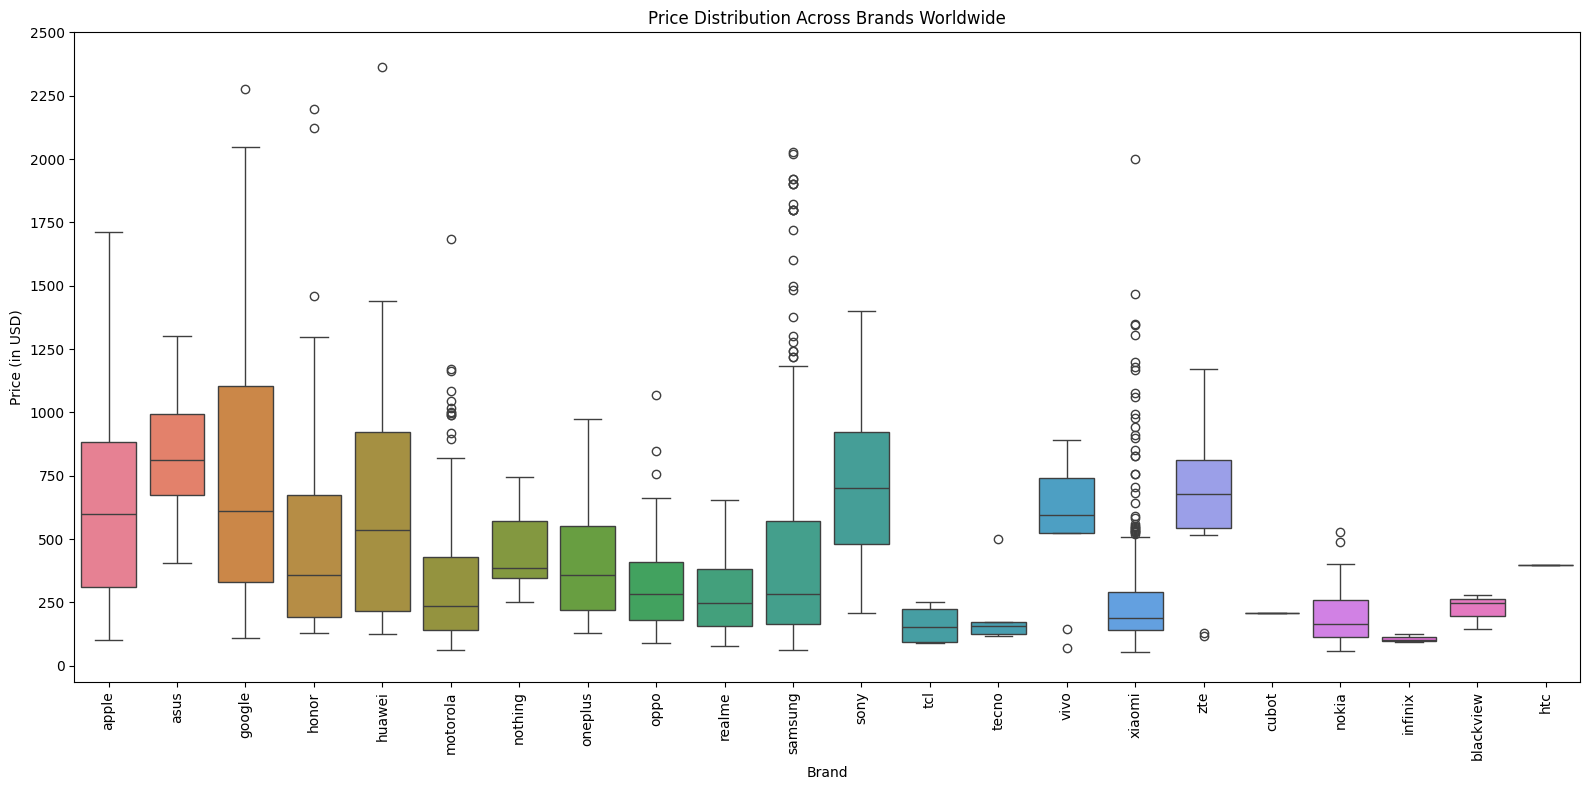

In [49]:
unique_brands = df_all['phone_brand'].unique()
palette = sns.color_palette("husl", len(unique_brands))
max_price = df_all['price_USD'].max()
#Visualize Price distribution across Brands
plt.figure(figsize=(16, 8))
sns.boxplot(x='phone_brand', y='price_USD', data=df_all,hue='phone_brand',palette=palette,legend=False)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max_price + 250, 250))
plt.title('Price Distribution Across Brands Worldwide')
plt.xlabel('Brand')
plt.ylabel('Price (in USD)')
plt.tight_layout()
plt.show()

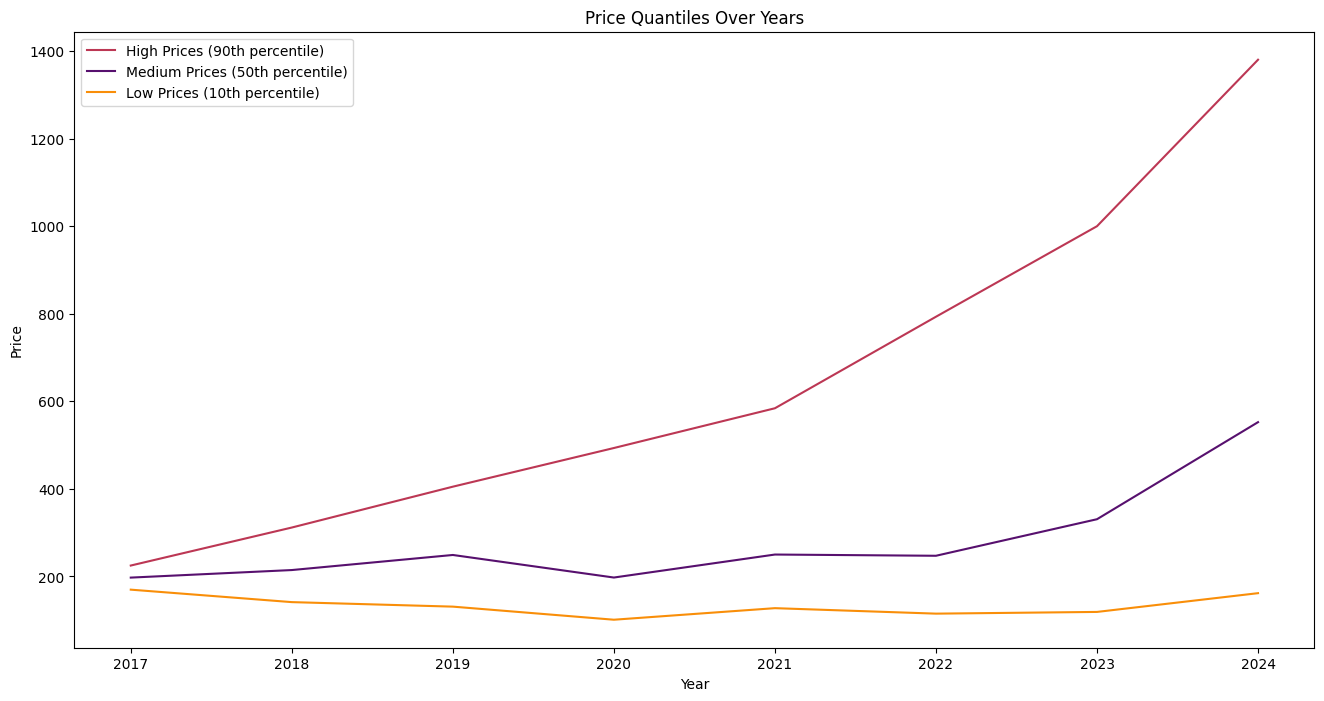

In [26]:
plt.figure(figsize=(16, 8))
pallet_Quantiles = sns.color_palette("inferno", 3)
plt.plot(price_quantiles['Year'], price_quantiles['quantile_90'], label='High Prices (90th percentile)', color=pallet_Quantiles[1])
plt.plot(price_quantiles['Year'], price_quantiles['quantile_50'], label='Medium Prices (50th percentile)', color=pallet_Quantiles[0])
plt.plot(price_quantiles['Year'], price_quantiles['quantile_10'], label='Low Prices (10th percentile)', color=pallet_Quantiles[2])
plt.title('Price Quantiles Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


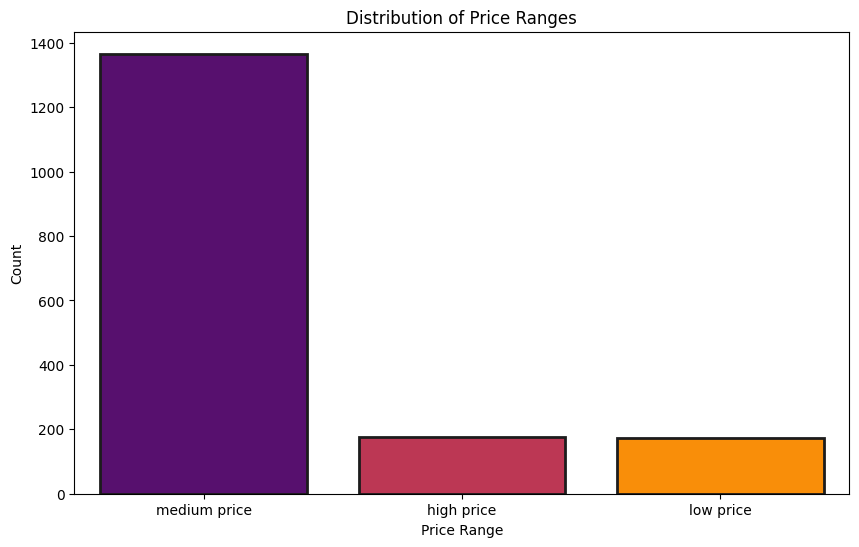

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_all, x='price_range',palette='inferno',saturation=1, edgecolor = "#1c1c1c", linewidth = 2,hue='price_range',legend=False)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


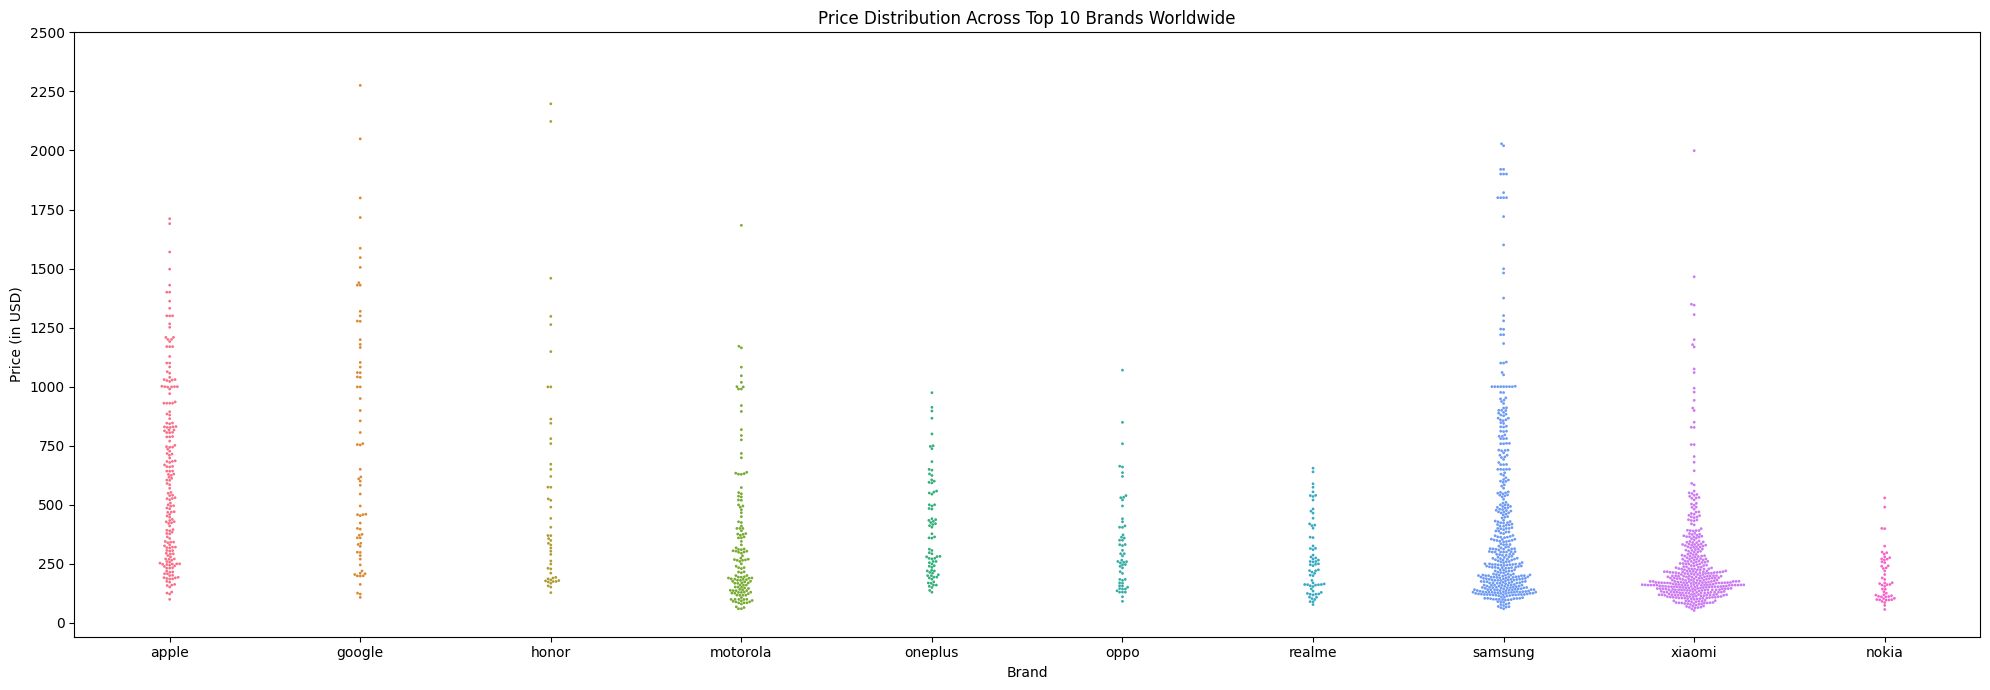

In [28]:
# Get the top 10 most popular brands
top_10_brands = df_all['phone_brand'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 brands
df_top_10_brands = df_all[df_all['phone_brand'].isin(top_10_brands)]

# Generate the plot
unique_brands = df_top_10_brands['phone_brand'].unique()
palette = sns.color_palette("husl", len(unique_brands))
max_price = df_top_10_brands['price_USD'].max()


plt.figure(figsize=(20, 7))
sns.swarmplot(x='phone_brand', y='price_USD', data=df_top_10_brands, hue='phone_brand', palette=palette, legend=False, size=2)
plt.yticks(np.arange(0, max_price + 250, 250))
plt.title('Price Distribution Across Top 10 Brands Worldwide')
plt.xlabel('Brand')
plt.ylabel('Price (in USD)')
plt.tight_layout()
plt.show()

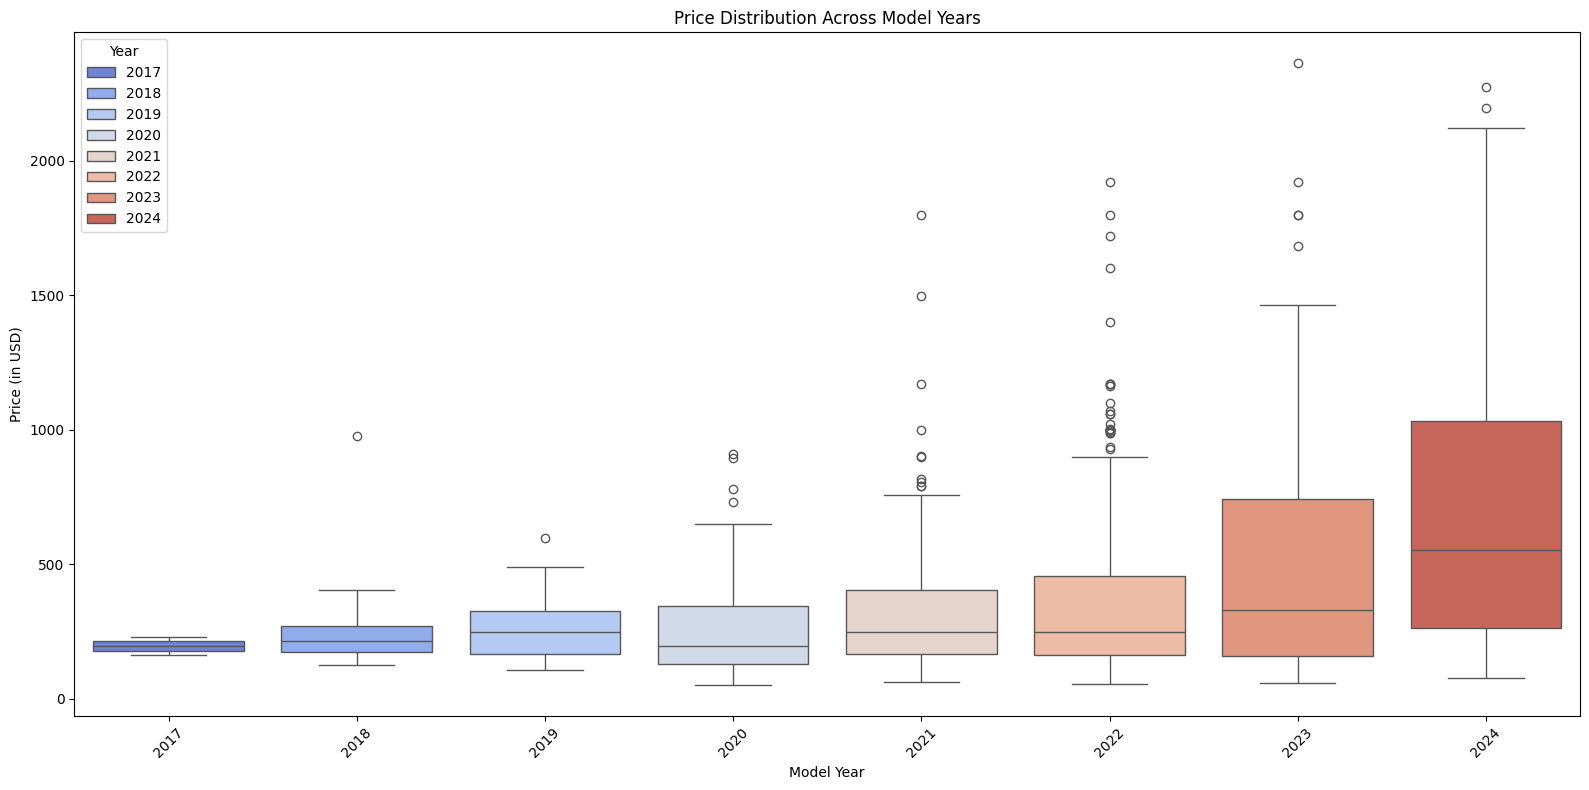

In [51]:
unique_years = df_all['Year'].dropna().unique()
palette = sns.color_palette("coolwarm",len(unique_years))
#Visualize Price distribution across Model Year
plt.figure(figsize=(16,8))
sns.boxplot(x='Year', y='price_USD', data=df_all,hue='Year',palette=palette)
plt.xticks(rotation=45)
plt.title('Price Distribution Across Model Years')
plt.xlabel('Model Year')
plt.ylabel('Price (in USD)')
plt.tight_layout()
plt.show()

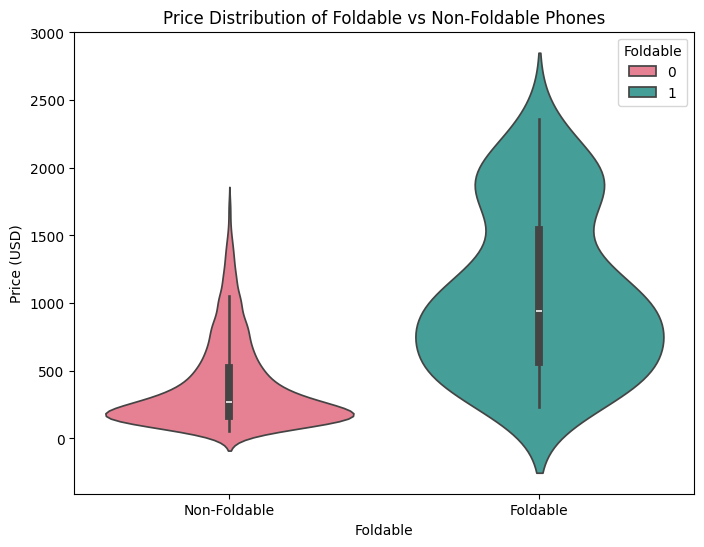

In [30]:
palette = sns.color_palette('husl', 2)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Foldable', y='price_USD', data=df_all,palette=palette,hue='Foldable',)
plt.title('Price Distribution of Foldable vs Non-Foldable Phones')
plt.xlabel('Foldable')
plt.ylabel('Price (USD)')
plt.xticks([0, 1], ['Non-Foldable', 'Foldable'])
plt.show()

# Conclusions

The **price of smartphones has steadily increased over the years**, with greater variation in pricing for more recent models. This trend can be attributed to several factors, including the **introduction of more premium and high-end models**, inflationary effects, and advancements in phone technology such as 5G connectivity, improved cameras, and **foldable displays**. Additionally, older models are no longer sold, and the prices analyzed reflect **current market prices\*, which may differ from original **launch prices\*\*.

Brand positioning continues to play a crucial role in the smartphone market, strongly correlating with price. **Premium brands** like **Apple**, **Samsung**, and **Google** dominate the higher price ranges,
Meanwhile, **budget-friendly brands** like **Tecno** and **Blackview** tend to focus on the lower end of the market, offering affordable alternatives with fewer advanced features. **Mid-tier brands**, such as **Xiaomi** and **OnePlus**, offer a broad range of pricing options, catering to both budget-conscious consumers and those looking for high-end, flagship-level features without the premium pricing of **foldable models**.

### **Overall**,

yhe smartphone market has become increasingly **segmented**, with newer models offering a **wider diversity in pricing and features**. **Foldable phones**, in particular, represent a new frontier in premium pricing, appealing to early adopters and tech enthusiasts willing to pay a significant premium for cutting-edge technology. Meanwhile, traditional phones continue to offer a range of options across price points.

Consumers now have more choices depending on their **budget** and **performance needs**, with brands striving to cater to various market segments. The result is a highly differentiated market where some buyers prioritize affordability, while others seek out the latest innovations, including **foldable displays**, even at a higher price. As this trend continues, foldable phones will likely drive up the average price of smartphones even further, while traditional models will maintain a more stable price range, especially among mid-tier and budget brands.


<a id="7"></a>

# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlations</p>


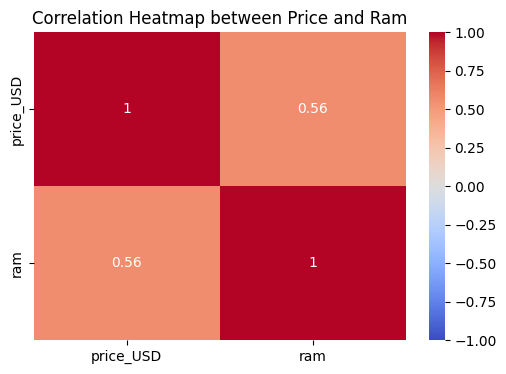

In [31]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'ram']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Ram')
plt.show()

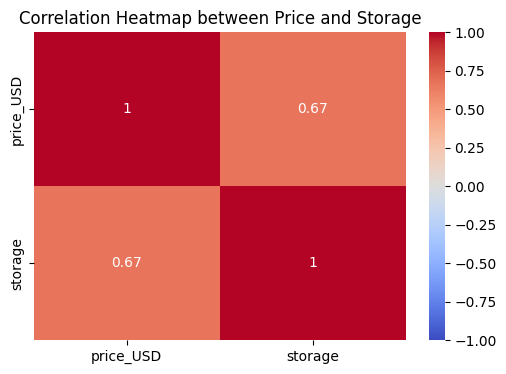

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'storage']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Storage')
plt.show()

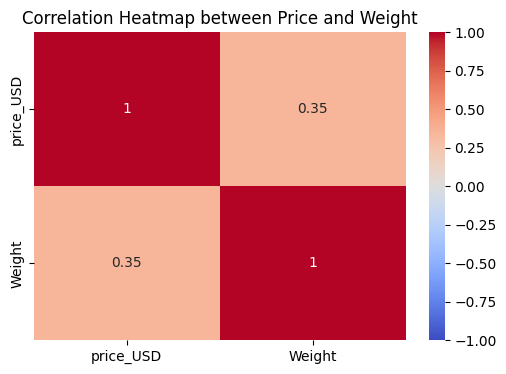

In [33]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'Weight']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Weight')
plt.show()

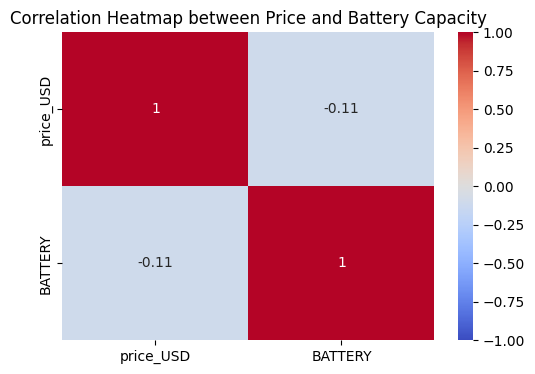

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'BATTERY']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Battery Capacity')
plt.show()

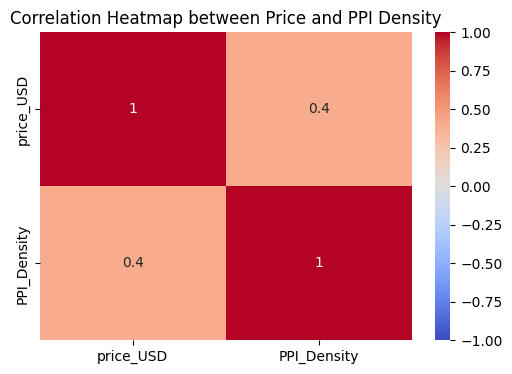

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'PPI_Density']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and PPI Density')
plt.show()

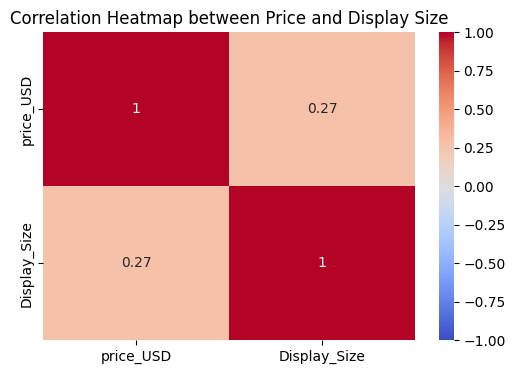

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'Display_Size']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Display Size')
plt.show()

In [37]:
corr, p_value = pointbiserialr(df_all['Foldable'], df_all['price_USD'])

print(f'Point-Biserial Correlation: {corr}')
print(f'P-value: {p_value}')

Point-Biserial Correlation: 0.40593752677080686
P-value: 4.958762626880582e-69


In [38]:
corr, p_value = pointbiserialr(df_all['NFC'], df_all['price_USD'])

print(f'Point-Biserial Correlation: {corr}')
print(f'P-value: {p_value}')

Point-Biserial Correlation: 0.22971802917458067
P-value: 5.666462474995872e-22


# Conclusions

The overall takeaway is that when looking at pricing trends for devices, higher **RAM** and **storage** capacities typically push the price up, with storage having a stronger effect. However, weight does not have a substantial influence on price, meaning manufacturers likely prioritize **performance features** (RAM and storage) over **physical characteristics** (weight,display size) when setting prices..

The strong point-biserial **correlation (0.9001)** implies that there is a strong positive relationship between the binary variable (whether the phone is **foldable** or not) and the continuous variable (**price**). The high correlation suggests that **foldable** phones tend to be associated with **higher prices**.
The **p-value (0.0145)** indicates that this relationship is statistically significant, meaning that the association between a phone being foldable and its price is unlikely to be due to chance.
Therefore, we can conclude that whether a phone is foldable has a significant impact on its price.

**NFC** has a **statistically significant**, but **weak** positive impact on the price of a phone. This means that, in general, phones with NFC tend to be priced higher than those without, but the effect size (the correlation) is not particularly strong.

### **Overall**,

In summary, manufacturers tend to prioritize performance features such as **storage** and **RAM** over physical characteristics like **weight** when setting prices, and **foldable** phones, in particular, are priced significantly higher.


<a id="8"></a>

# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Most common configs</p>


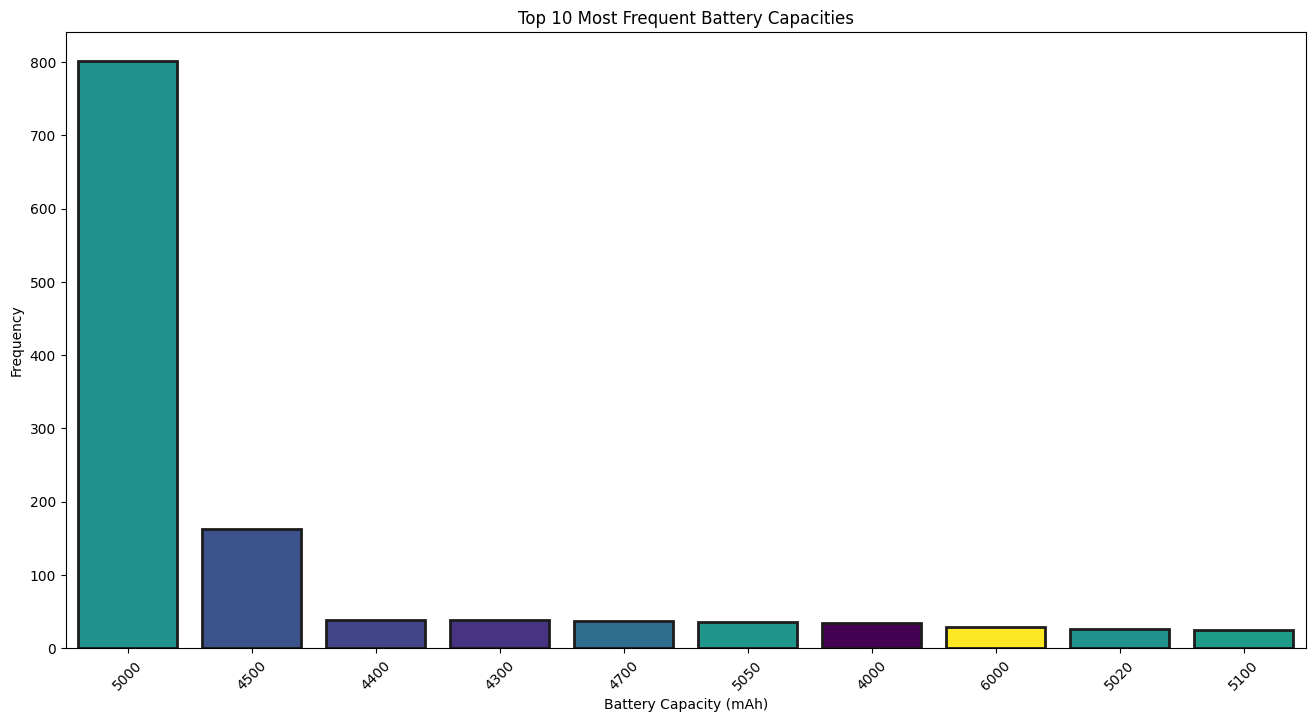

In [39]:
top_10_battery = df_all['BATTERY'].value_counts().head(10).reset_index()
top_10_battery.columns = ['BATTERY', 'Frequency']
plt.figure(figsize=(16, 8))
sns.barplot(x='BATTERY', y='Frequency', data=top_10_battery, palette='viridis', order=top_10_battery['BATTERY'],saturation=1, edgecolor = "#1c1c1c", linewidth = 2,hue='BATTERY',legend=False)
plt.title('Top 10 Most Frequent Battery Capacities')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Conclusion

In recent years, most of the smartphone market has pivoted towards incorporating **5000mAh batteries** as a standard feature, driven by consumer demand for longer battery life and the increasing power requirements of modern devices. While other battery capacities, such as **4500mAh** or **6000mAh**, are still available, they are vastly outnumbered by the widespread adoption of 5000mAh batteries in both mid-range and flagship models.


In [40]:
def ram_storage_group(df):
    grouped = df.groupby(['ram', 'storage']).agg(
        count=('price_USD', 'size'),  
        avg_price=('price_USD', 'mean')  
    ).reset_index()
    grouped['avg_price'] = grouped['avg_price'].round(2)  
    return grouped.sort_values(by='count', ascending=False)  
most_common_configs = ram_storage_group(df_all)

table = PrettyTable()
# Add column names
table.field_names = most_common_configs.columns.tolist()
# Add rows to the table
for index, row in most_common_configs.head(10).iterrows():
    table.add_row(row)

print(table)


+------+---------+-------+-----------+
| ram  | storage | count | avg_price |
+------+---------+-------+-----------+
| 8.0  |  256.0  | 326.0 |   395.01  |
| 6.0  |  128.0  | 185.0 |   203.92  |
| 8.0  |  128.0  | 175.0 |   251.5   |
| 4.0  |  128.0  | 175.0 |   162.38  |
| 12.0 |  256.0  | 169.0 |   442.12  |
| 12.0 |  512.0  | 152.0 |   784.85  |
| 6.0  |  256.0  |  61.0 |   484.22  |
| 8.0  |  512.0  |  59.0 |   799.99  |
| 4.0  |   64.0  |  55.0 |   141.36  |
| 16.0 |  512.0  |  45.0 |  1009.98  |
+------+---------+-------+-----------+


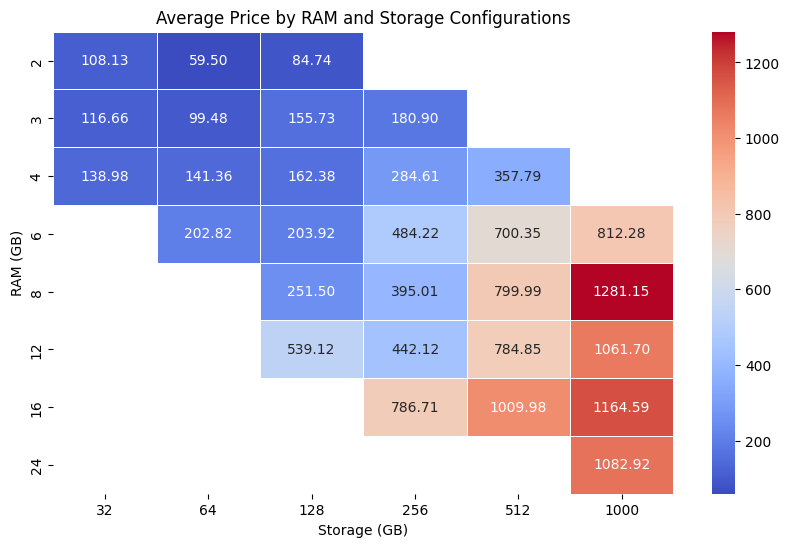

In [41]:
pivot_table = most_common_configs.pivot_table(index='ram', columns='storage', values='avg_price')
# Create a heatmap based on the average prices
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')
plt.show()

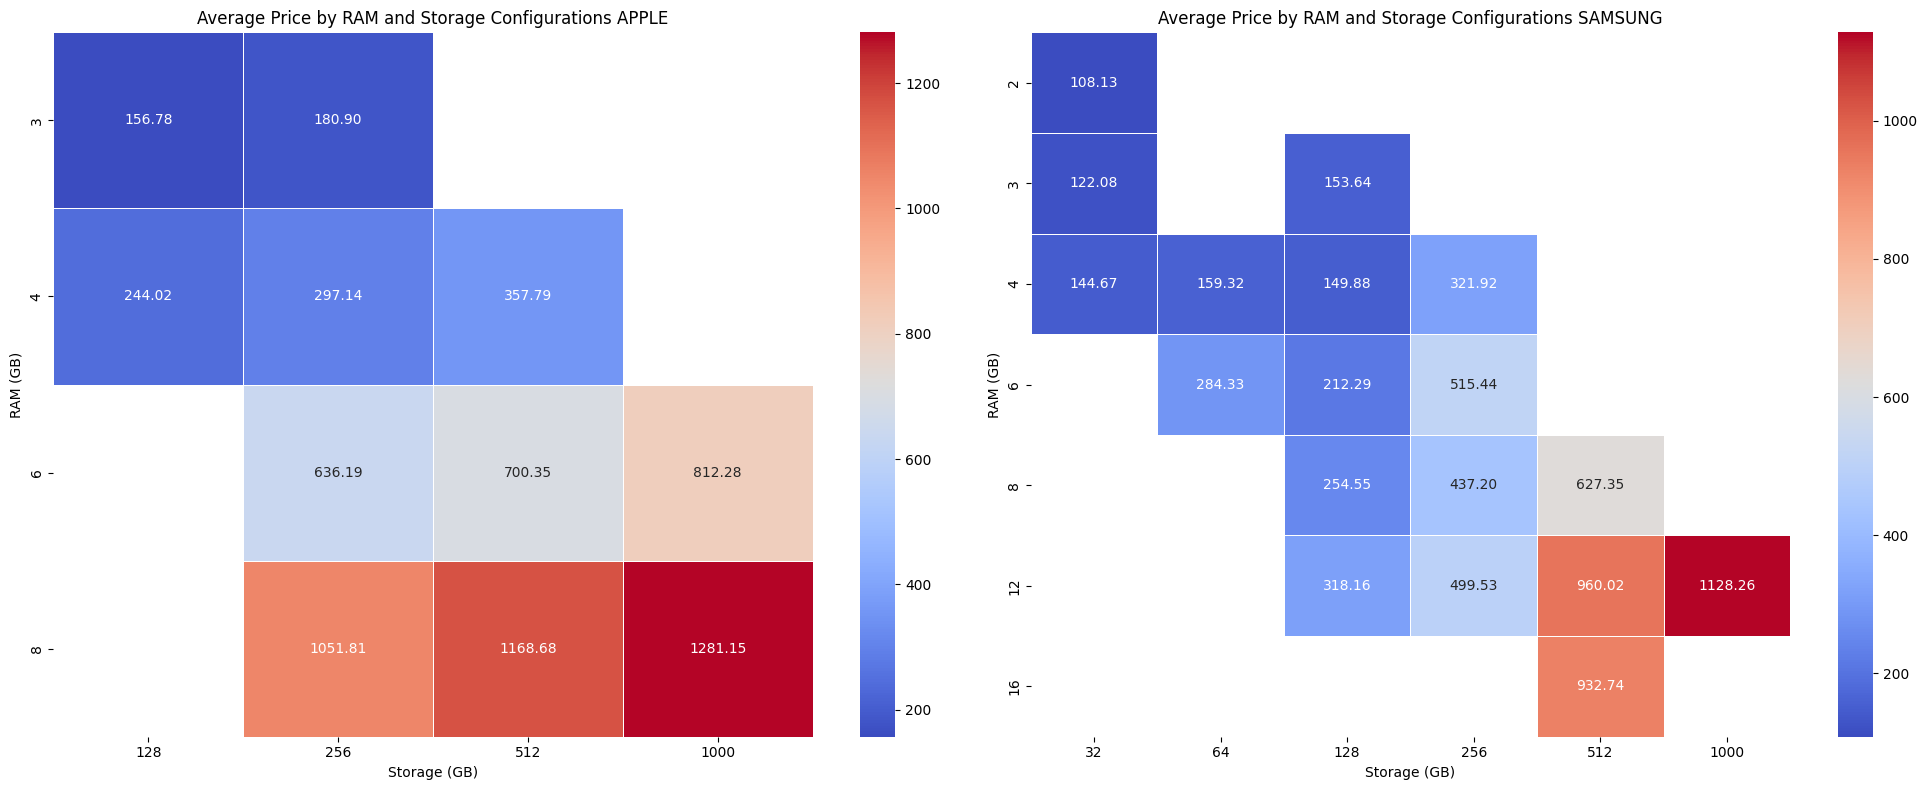

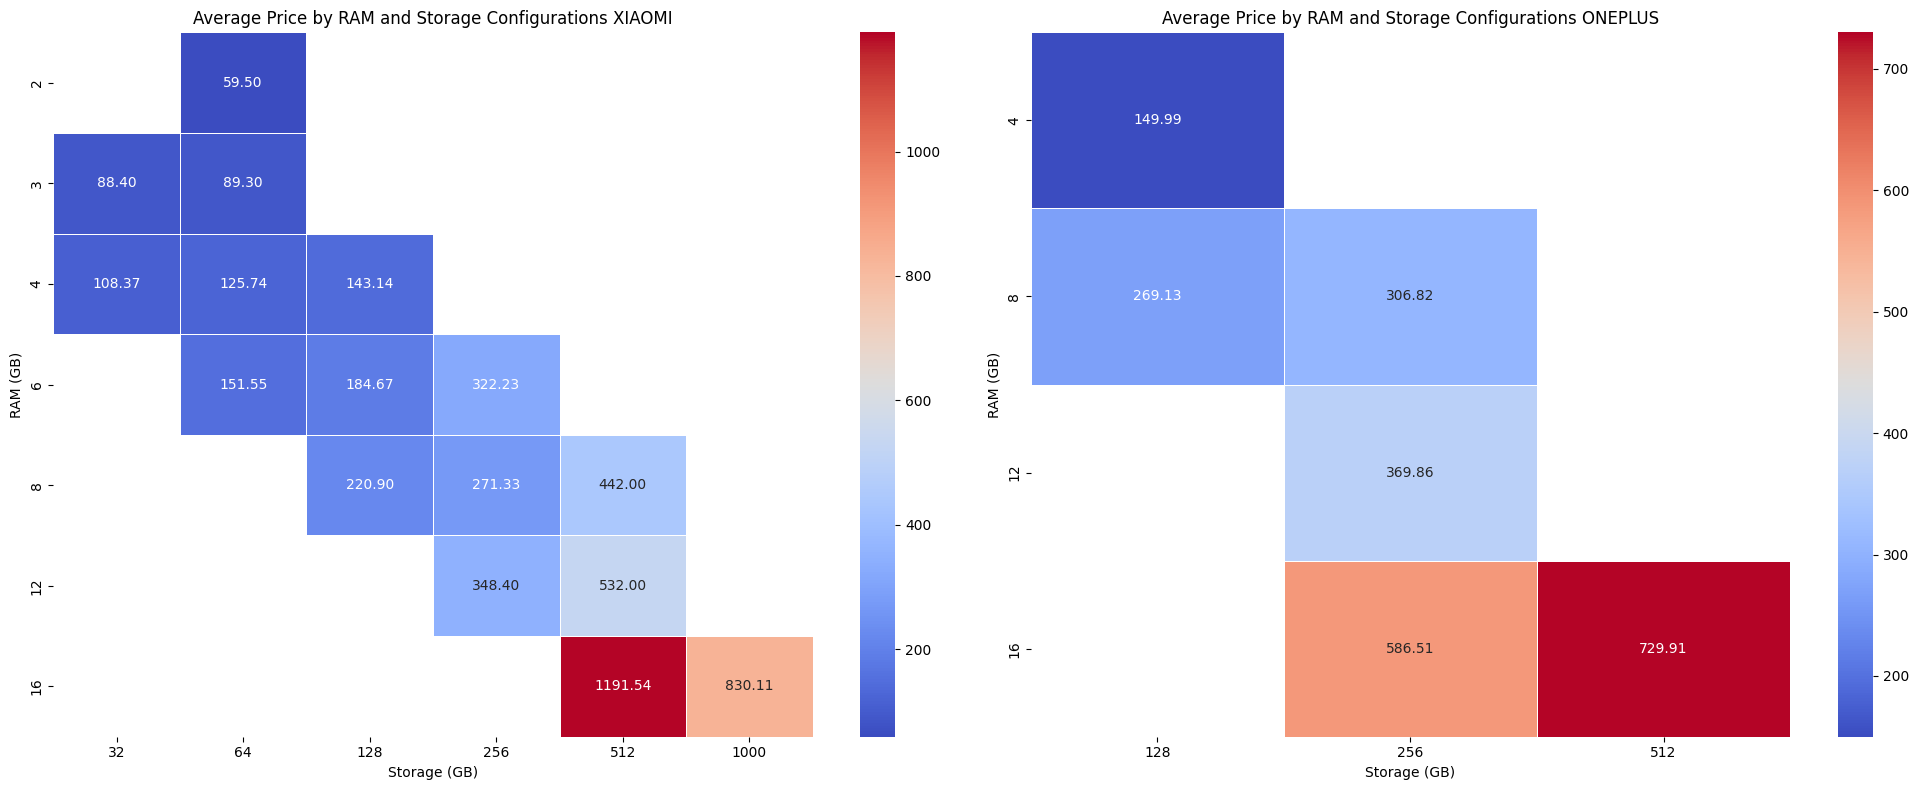

In [42]:
df_apple = df_all[df_all['phone_brand'] == 'apple']
df_samsung = df_all[df_all['phone_brand'] == 'samsung']
df_oneplus = df_all[df_all['phone_brand'] == 'oneplus']
df_xiaomi = df_all[df_all['phone_brand'] == 'xiaomi']
most_common_configs_apple=ram_storage_group(df_apple)
pivot_table = most_common_configs_apple.pivot_table(index='ram', columns='storage', values='avg_price')
most_common_configs_samsung = ram_storage_group(df_samsung)
pivot_table_samsung = most_common_configs_samsung.pivot_table(index='ram', columns='storage', values='avg_price')

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations APPLE')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_table_samsung, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations SAMSUNG')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')
plt.tight_layout()
plt.show()

most_common_configs_xiaomi = ram_storage_group(df_xiaomi)
pivot_table_xiaomi = most_common_configs_xiaomi.pivot_table(index='ram', columns='storage', values='avg_price')
most_common_configs_oneplus = ram_storage_group(df_oneplus)
pivot_table_oneplus = most_common_configs_oneplus.pivot_table(index='ram', columns='storage', values='avg_price')

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(pivot_table_xiaomi, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations XIAOMI')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_table_oneplus, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations ONEPLUS')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')
plt.tight_layout()
plt.show()


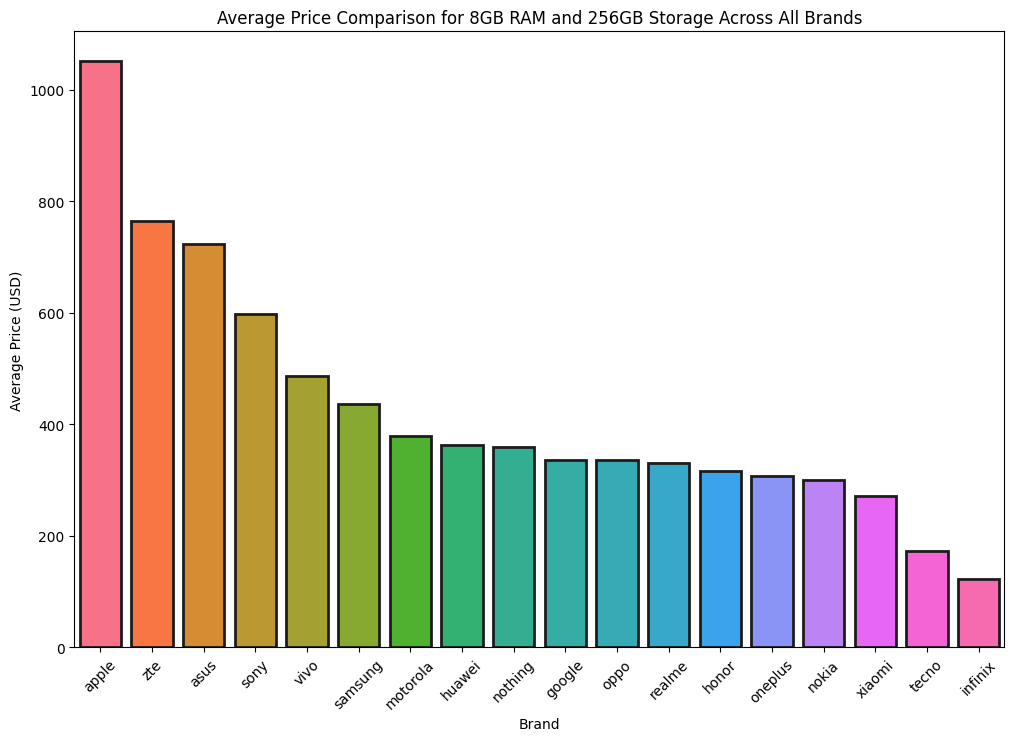

In [43]:


# Assuming df_all is already defined and contains the necessary data
# Filter the DataFrame for 8GB RAM and 256GB Storage
filtered_df = df_all[(df_all['ram'] == 8) & (df_all['storage'] == 256)]

# Group by brand and calculate the average price
avg_prices = filtered_df.groupby('phone_brand')['price_USD'].mean().reset_index()

# Sort the brands by average price for better visualization
avg_prices = avg_prices.sort_values(by='price_USD', ascending=False)

unique_brands = df_all['phone_brand'].unique()
palette = sns.color_palette("husl", len(unique_brands)-4) # Remove the last 4 colors to match the number of brands plotted
plt.figure(figsize=(12, 8))
sns.barplot(x='phone_brand', y='price_USD', data=avg_prices, palette=palette,hue='phone_brand',legend=False,saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
plt.title('Average Price Comparison for 8GB RAM and 256GB Storage Across All Brands')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

# Conclusion

Graphs indicate that as **RAM and storage capacities** increase, the **average price** of a device **rises significantly**. **Higher storage capacities** seem to have a **particularly strong effect** on price increases, as evidenced by the steep jump in pricing for higher storage tiers, especially at 512 GB and 1000 GB storage configurations. The highest RAM (24 GB) and storage combinations yield the steepest price increases, while lower storage and RAM configurations maintain much more affordable prices.

**Apple** stands out with the **highest price**, followed by ZTE and Asus. In contrast, brands like **Infinix, Tecno, and Xiaomi** offer more **affordable devices** in the same RAM and storage category, highlighting **significant price differences** between **premium** and **budget-friendly** brands.

# Overall

In summary, device pricing is **highly influenced by RAM and storage capacity**, with **storage** playing a **larger role** in determining price jumps. Brand **reputation** and **positioning** in the market also have a **clear impact**, as premium brands like Apple command much higher prices for equivalent RAM and storage configurations compared to budget-oriented brands like Infinix and Tecno.


<a id="9"></a>

# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Displays</p>


<AxesSubplot: xlabel='Display_Size', ylabel='price_USD'>

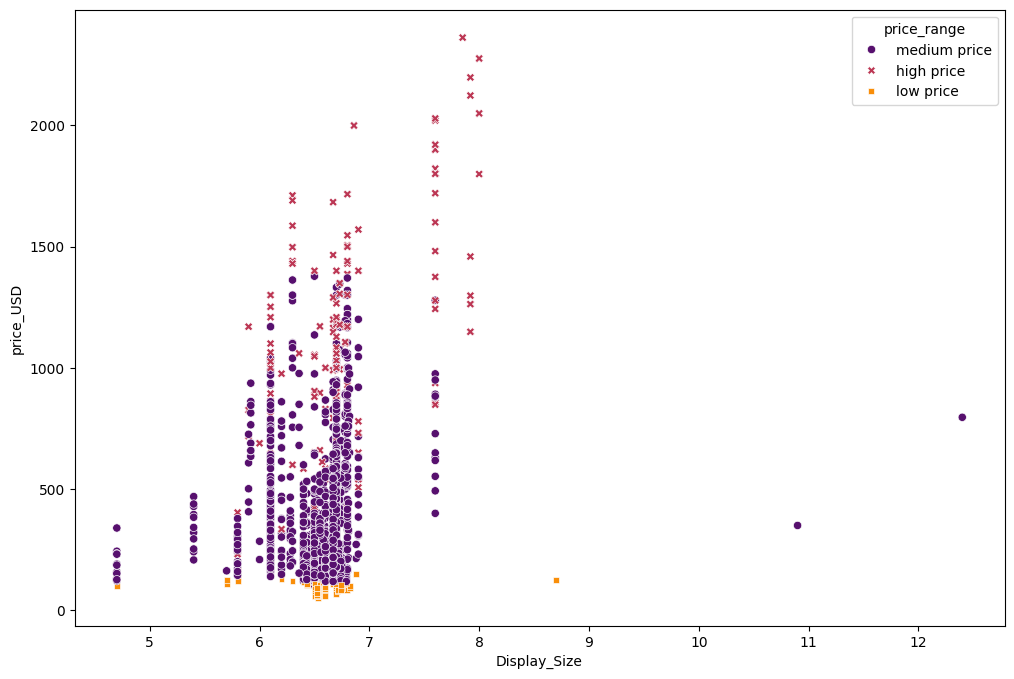

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Display_Size', y='price_USD', data=df_all, hue='price_range', style='price_range', palette='inferno')

<AxesSubplot: xlabel='PPI_Density', ylabel='price_USD'>

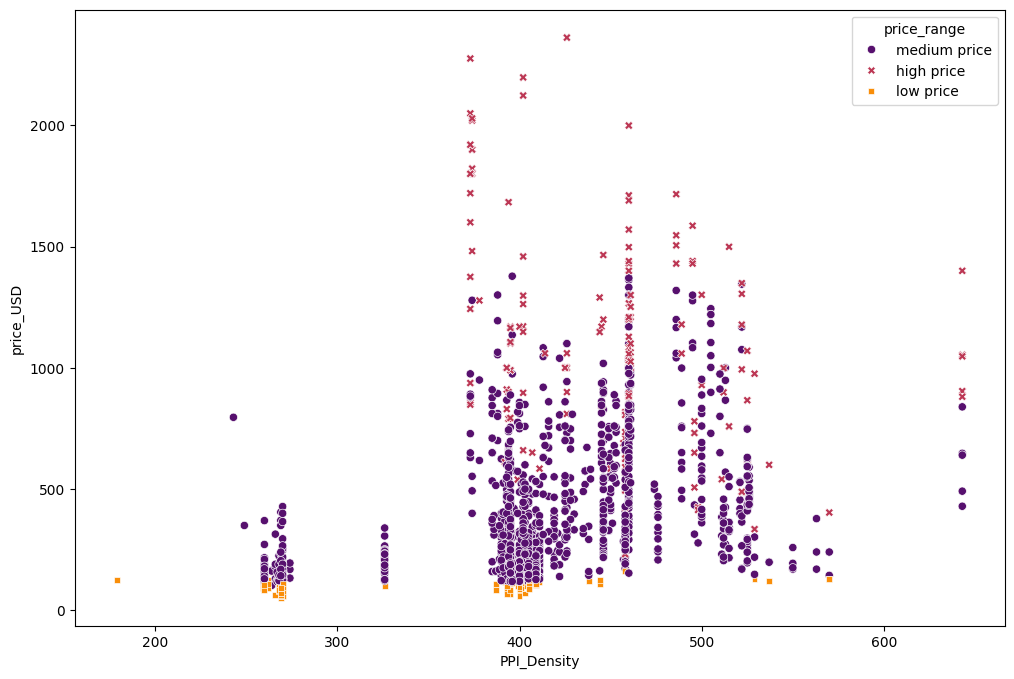

In [45]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PPI_Density', y='price_USD', data=df_all, hue='price_range', style='price_range', palette='inferno')

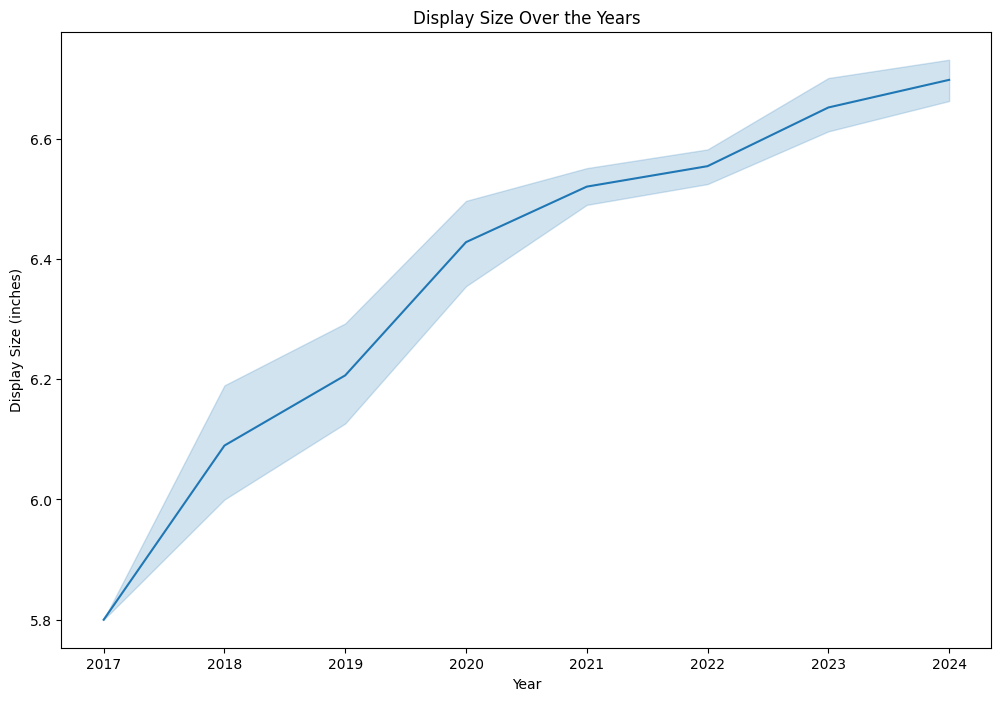

In [46]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Display_Size', data=df_all)
plt.title('Display Size Over the Years')
plt.xlabel('Year')
plt.ylabel('Display Size (inches)')
plt.show()

# Conclusion

## 1. Display Size vs. Price

- **Trend**: As the display size increases, the price of devices generally increases.
- **Price Categories**:
  - High-priced devices (red 'x') tend to have larger display sizes, mostly in the **6.5-7 inch range**, with a few outliers above **7 inches**.
  - Medium-priced devices (purple dots) are clustered between **6-7 inches**.
  - Low-priced devices (yellow squares) are mainly concentrated around **smaller displays**, below **6.5 inches**.
- **Outliers**: A few devices with **very large displays** (above **10 inches**) still belong to the **medium price** category, indicating exceptions to the general trend.

## 2. PPI Density vs. Price

- **Trend**: Higher **PPI (pixels per inch)** density correlates with **higher prices**.
- **Price Categories**:
  - High-priced devices (red 'x') are mostly found in the **400-500 PPI** range.
  - Medium-priced devices (purple dots) exhibit a **broader spread**, primarily between **350-450 PPI**.
  - Low-priced devices (yellow squares) cluster **below 400 PPI**, showing that **display quality** strongly influences price.
- **Outliers**: A few high-PPI devices (above **500 PPI**) are in the **medium and high price** ranges, with very few low-priced devices offering high PPI.

## 3. Display Size Over the Years

- **Trend**: Display sizes have steadily **increased** over the years.
- **Growth**: The average display size has grown from **5.8 inches in 2017** to nearly **6.7 inches in 2024**.
- **Uncertainty/Range**: The shaded area around the trend line shows increasing **variation** in display sizes over time, indicating that while **average size** is rising, there is still a **range of choices** in the market.

# Overall Insights

- **Display Size and Price**: Larger display sizes are generally linked to **higher prices**, though **exceptions** exist, particularly in the **medium price** category.
- **PPI and Price**: Devices with **higher pixel densities** tend to be **more expensive**, though **medium-priced** devices offer a wide **range of PPI values**.
- **Market Trend**: Over time, **display sizes** are increasing, likely driven by consumer demand for **larger screens** in smartphones, tablets, and other devices.

These conclusions highlight how both **display size** and **PPI density** are significant factors in determining the price of devices, with clear trends over time toward **larger** and **more expensive** models.


<a id="10"></a>

# <p style="padding:10px;background-color:white;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Final Thoughts</p>


### **Final Thoughts**

It is clear that **RAM** and **storage** play a significant role in determining a device's price, with storage capacity having a particularly strong influence. For consumers, this means that **opting for lower storage or RAM** configurations can significantly reduce costs without necessarily sacrificing performance for average use. On the other hand, **brand reputation** plays a major part in pricing, as premium brands like **Apple** maintain a much higher price point even with the same RAM and storage compared to other brands.

For manufacturers, this suggests that while **performance features** like RAM and storage are key pricing drivers, brand value and positioning are also crucial in allowing premium pricing. By focusing on **differentiating factors** like brand reputation and customer loyalty, manufacturers can justify higher prices, especially for flagship models.

### Premium Brands vs. Budget Alternatives

#### Premium Brands

Premium brands like **Apple** and **Samsung** command higher prices for their devices due to their **reputation**, **build quality**, and **advanced features**. These brands often lead in innovation, offering top-tier performance, superior camera quality, and longer software support, which justifies their price tags.

- **Pros**:

  - **Top-tier performance**: Premium brands generally offer **faster processors**, **better displays**, and **longer software updates**.
  - **Brand reliability**: Strong customer support and after-sales services from brands like **Apple** and **Samsung** ensure a **seamless user experience** over time.

- **Cons**:
  - **Higher cost**: Devices from premium brands are significantly more expensive, even for configurations with similar specs (RAM, storage) compared to budget options.
  - **Limited mid-range options**: Premium brands tend to focus on high-end devices, limiting choices for consumers seeking affordability without compromising on features.

#### Budget Alternatives

On the other hand, budget-friendly brands like **Xiaomi**, **Huawei**, and **Tecno** offer more affordable devices with competitive features. These brands deliver **good value for money** by providing devices with **adequate performance**, decent **camera quality**, and **larger batteries** at lower prices.

- **Pros**:

  - **Affordable pricing**: Budget brands offer **lower-cost devices** with acceptable performance for everyday tasks, making them accessible to a wider range of consumers.
  - **Feature-packed**: Many budget devices still offer impressive features like high-resolution cameras, long battery life, and decent processing power.

- **Cons**:
  - **Less durable**: The build quality may not be as robust as premium brands, leading to quicker wear-and-tear.
  - **Shorter software support**: Budget devices typically have fewer updates and a shorter lifecycle in terms of software support.

---

### Foldable Phones: The Innovation Frontier

**Foldable phones** represent a new segment in the smartphone market, primarily led by **Samsung** and other brands like **Huawei**. These devices are known for their **innovative design**, featuring foldable displays that offer a larger screen area in a more compact form factor. However, foldable technology comes with a mix of pros and cons, and prices tend to be significantly higher compared to traditional smartphones.

- **Pros**:

  - **Innovative design**: Foldable phones offer unique designs with **flexible displays**, enabling larger screen sizes for multi-tasking and media consumption.
  - **Advanced features**: Premium foldable phones often come with **high-end specs**, including **top-tier processors**, **advanced cameras**, and **large batteries** to support their unique form factors.

- **Cons**:
  - **Expensive**: Foldable phones, especially from premium brands like **Samsung**, are priced much higher than regular smartphones, limiting their accessibility.
  - **Durability concerns**: The folding mechanism and flexible display can be prone to wear and tear over time, and repairs can be costly.

#### Budget Foldable Alternatives

Brands like **Huawei** and **Xiaomi** have introduced more affordable foldable phones, making this innovative technology more accessible to a broader audience.

- **Pros**:

  - **Cost-effective**: Cheaper foldable models from brands like **Huawei** offer **affordable entry** into foldable technology without sacrificing essential features.
  - **Good performance**: Despite being lower priced, these devices still provide **decent specs** and a foldable design, making them attractive alternatives to higher-priced models.

- **Cons**:
  - **Lower build quality**: Budget foldables may compromise on the durability of the hinge and screen, affecting long-term usage.
  - **Limited software updates**: Like other budget models, foldable phones from these brands may not receive as many software updates, reducing their lifespan.

---

### **Conclusion**

In summary, consumers face a choice between **premium brands**, which offer top-tier performance and reliability at higher prices, and **budget-friendly alternatives**, which provide good value but come with trade-offs in build quality and software support. **Foldable phones** add another dimension to this decision, with **premium foldables** offering cutting-edge innovation but at a steep price, while **budget foldables** offer a more accessible entry into this new technology with some compromises. Ultimately, the decision depends on whether consumers prioritize innovation and durability or cost-effectiveness.


In [ ]:
df_all.to_csv('data/processed_data.csv', index=False)